# Predicting heart disease using Machine Learning

This notebook uses various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease or not based on their medical attributes

Our approach:-
1. Problem  Definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Defintion

In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have a heart disease.

## 2. Data

The original data came from the Cleavland data from the UCI Machine Learning Repository
https://archive.ics.uci.edu/ml/datasets/heart+Disease

## 3. Evaluation

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease, we will conclude the project as successful.

## 4. Features

**Create data dictionary**

* age - age in years
* sex - (1 = male; 0 = female)
* cp - chest pain type
* trestbps - resting blood pressure (in mm Hg on admission to the hospital)
* chol - serum cholestoral in mg/dl
* fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* restecg - resting electrocardiographic results
* thalach - maximum heart rate achieved
* exang - exercise induced angina (1 = yes; 0 = no)
* oldpeak - ST depression induced by exercise relative to rest
* slope - the slope of the peak exercise ST segment
* ca - number of major vessels (0-3) colored by flourosopy
* thal - thalium stress result
* target - have disease or not (1=yes, 0=no) (= the predicted attribute)

## Preparing the tools

We're going to use Pandas, Matplotlib and NumPy for data analysis and manipulation.

In [8]:
# Import all the tools we need

# Regular EDA and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Models from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import f1_score, precision_score,recall_score
from sklearn.metrics import roc_curve

# Load data

In [174]:
df = pd.read_csv("heart.csv")
df.shape

(1025, 14)

# Data Exploration

The goal here is to find more about the data 

1. What question(s) are you trying to solve?
2. What kind of data do we have and how do you treat different types
3. What's missing from the data and how do you deal with it
4. Where are the outliers and why you should care about them?
5. How can you add, change or remove features to get more out of your data?


In [175]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [176]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


`value_counts()` allows you to show how many times each of the values of a categorical column appear

In [177]:
df.target.value_counts()

1    526
0    499
Name: target, dtype: int64

We can see that it is a balanced column as the counts to yes(1) or no(0) are similar. 
Therefore, this problem would be comparitively easier to model than an unbalanced column
# Now let's try to visualize this

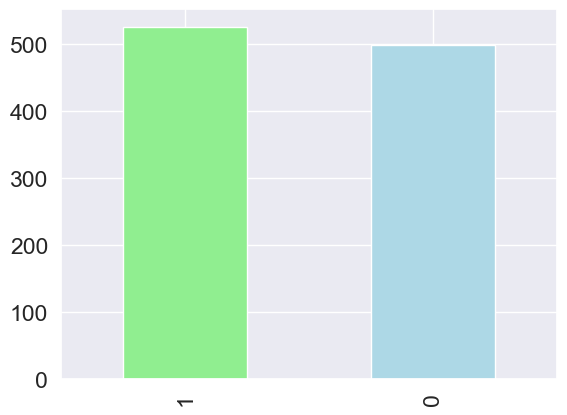

In [178]:
df.target.value_counts().plot(kind="bar",color=['lightgreen','lightblue']);

In [179]:
df.info() # Gives us information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [180]:
# Check if there are any missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [181]:
df.describe() # Gives statistical info about the data like mean, count etc

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Finding patterns between data
1. Sex and target

In [182]:
df.sex.value_counts()   # 0 is female and 1 is male

1    713
0    312
Name: sex, dtype: int64

In [183]:
# Now comparing target column with sex column using pd.crosstab
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,86,413
1,226,300


# What can we infer from this comparison?
* Firstly out of 96 females, 72 have a heart disease so this means that there is a 75% chance of a woman having a heart disease
* Secondly out of 207 males, 93 have a heart disease so this means that there is roughly a 50% chance of man having a heart disease
* On an average there is a 62.5% chance of having a heart disease

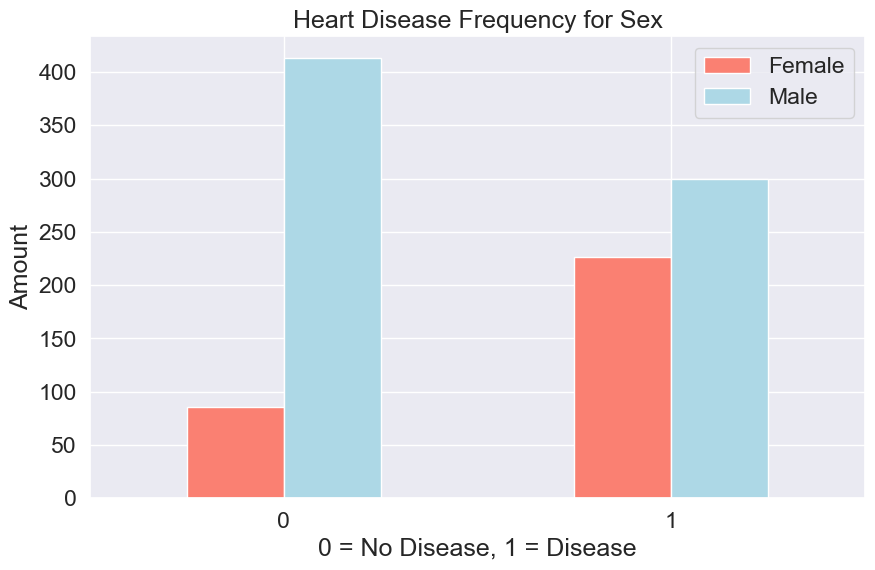

In [184]:
# Now let's try to plot this using a bar graph
pd.crosstab(df.target,df.sex).plot(kind="bar",color=['salmon','lightblue'],figsize=(10,6))
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation=0);

2.Let's try to compare target with chest pain type (cp)


In [185]:
df.cp.value_counts()

0    497
2    284
1    167
3     77
Name: cp, dtype: int64

In [186]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,375,122
1,33,134
2,65,219
3,26,51


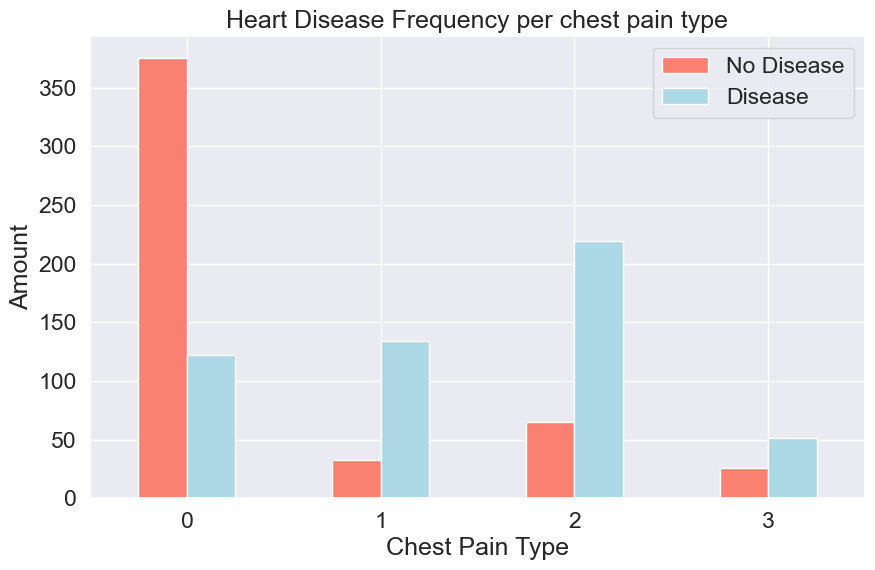

In [187]:
pd.crosstab(df.cp,df.target).plot(kind='bar',figsize=(10,6),color=['salmon','lightblue'])
plt.title("Heart Disease Frequency per chest pain type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease","Disease"])
plt.xticks(rotation=0);
#Note that cp is chest pain type and we are comparing that with heart disease (target)

In [188]:
df.thalach.value_counts()

162    35
160    31
163    29
173    28
152    28
       ..
194     3
185     3
106     3
88      3
113     3
Name: thalach, Length: 91, dtype: int64

# Age v/s Max Heart Rate (thalach) for Heart Disease

* We know that different values of thalach are 91, so instead of a bar graph we should use a scatter plot to visualize it better

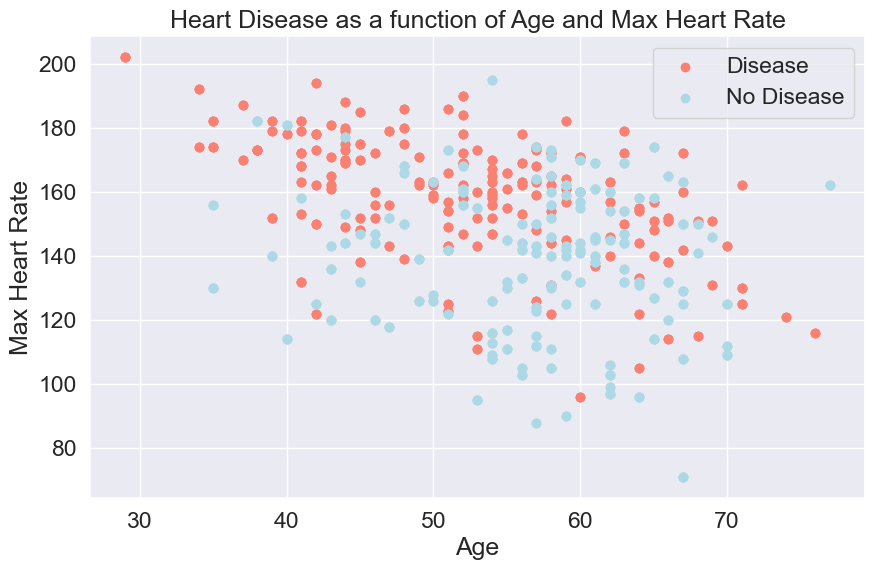

In [189]:
# Let's create a figure 
plt.figure(figsize=(10,6))

# Create a scatter plot with positive examples where target is 1 or heart disease is present
plt.scatter(df.age[df.target==1],df.thalach[df.target==1],color='salmon');

# Create a scatter plot with negative examples where target is 0 or heart disease is absent
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],color='lightblue')

# Add titles and x,y labels
plt.title("Heart Disease as a function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease","No Disease"]);

* We can't infer much from this, so let's leave this task upto the machine learning algorithm to find a strong pattern between age and max heart rate

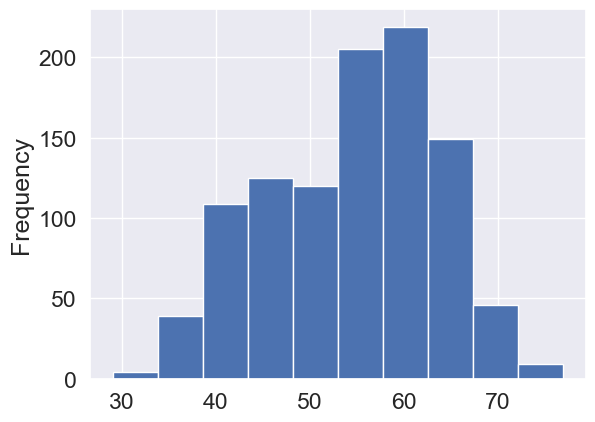

In [190]:
# Check the distribution of the age column with a histogram
df.age.plot.hist();

# Note that it comes out to be similar to be a normal distribution

In [191]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [192]:
# Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


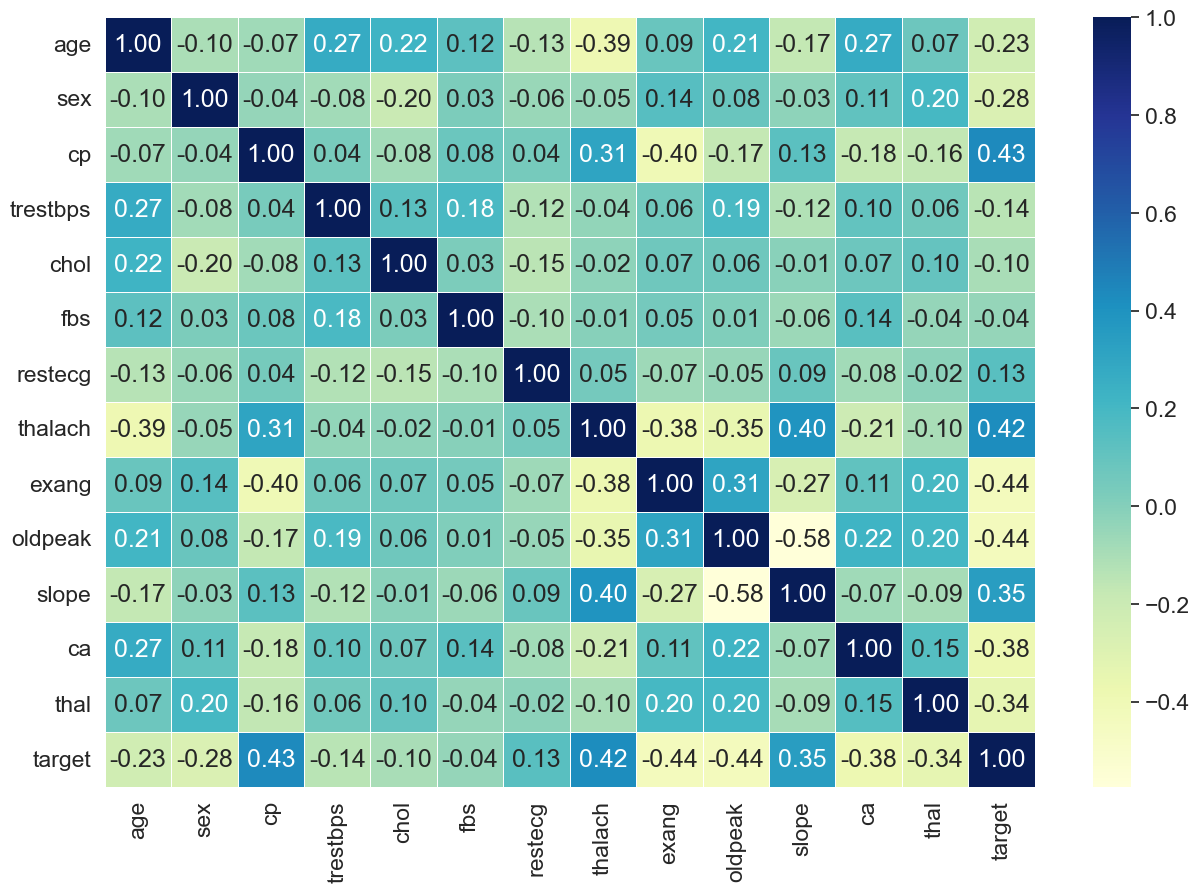

In [193]:
# Let's make it visual using a heatmap
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt=".2f",cmap='YlGnBu');

# Some points to note here
* If the correlation is +1, this implies that there is a complete positivedependency between two attributes. This is usually only in diagonals (same column). If one attribute increases, then the other increases perfectly.
* If the correlation is +ve but less than 1, this means that they are positively correlated, that is, if one attribute increases then the other increases as well.
*  If the correlation is -ve but greater than -1, this means that they are negatively correlated, that is, if one attribute increases then the other decreases.
* If the correlation is -1, this implies that there is a perfect negative correlation. If one attribute increases, then the other decreases perfectly.

# 5. Modelling

In [194]:
# Let's Split our data into X and y
X = df.drop("target",axis=1)

y = df["target"]

In [195]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [196]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [197]:
# Split data into train and test sets
np.random.seed(42)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [198]:
X_train.shape ,X_test.shape

((820, 13), (205, 13))

Now we have got our data prepared.
Let's try different models and find out which suits our data best.
# Different models we will use are:-
1. Logistic Regression --> `LogisticRegression()`
2. K-Nearest Neighbours --> `KNeighborsClassifier()`
3. Random Forest Classification --> `RandomForestClassifier()`

* Let's put models into a dictionary and score them using a function so we don't have to write long pieces of code again and again

In [199]:
models = {"Logistic Regression": LogisticRegression(),"KNN":KNeighborsClassifier(),"Random Forest":RandomForestClassifier()}

# Create a function to fit and score models

def fit_and_score(models,X_train,X_test,y_train,y_test):
    '''
    Fits and evaluates given machine learning models.
    models : A dictionary of different Scikit-Learn Machine Learning Models
    X_train : Training data (no labels)
    X_test: Testing data (no labels)
    y_train : Training labels
    y_test : Testing labels
    '''
    np.random.seed(42)
    #Make a dictionary to keep model scores
    model_scores={}
    #Loop through models
    for name, model in models.items():
        model.fit(X_train,y_train)    # Fit the model to data
        #Evaluate the model and append to the model_scores dictionary
        model_scores[name] = model.score(X_test,y_test)
    return model_scores    

In [200]:
model_scores = fit_and_score(models=models,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)
model_scores

C:\Users\Anant Roop Mathur\anaconda4\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.7853658536585366,
 'KNN': 0.7317073170731707,
 'Random Forest': 0.9853658536585366}

### Model Comparison

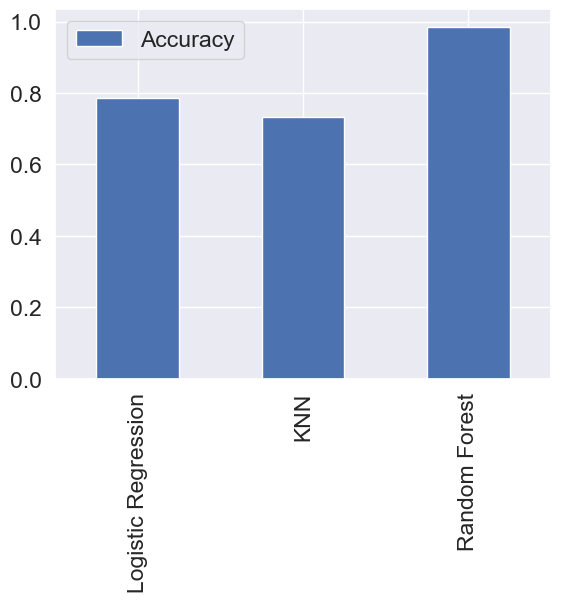

In [201]:
model_compare=pd.DataFrame(model_scores,index=["Accuracy"])
model_compare.T.plot.bar();

# Hyperparameter Tuning

In [202]:
# Let's tune KNN
train_scores=[]
test_scores=[]

# Create a list of different values of n_neighbors
neighbors = range(1,21)

# Set up a KNN Instance
knn=KNeighborsClassifier()

#Loop through n neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    #Fit the algorithm
    knn.fit(X_train,y_train)
    
    #Update the train scores list
    train_scores.append(knn.score(X_train,y_train))
    
    #Update the test scores list
    test_scores.append(knn.score(X_test,y_test))

In [203]:
train_scores

[1.0,
 0.9963414634146341,
 0.9914634146341463,
 0.947560975609756,
 0.9231707317073171,
 0.8207317073170731,
 0.7914634146341464,
 0.7926829268292683,
 0.7670731707317073,
 0.7853658536585366,
 0.775609756097561,
 0.7695121951219512,
 0.7609756097560976,
 0.7817073170731708,
 0.7670731707317073,
 0.7670731707317073,
 0.75,
 0.7597560975609756,
 0.7634146341463415,
 0.7682926829268293]

In [204]:
test_scores

[0.9853658536585366,
 0.9560975609756097,
 0.9024390243902439,
 0.8097560975609757,
 0.7317073170731707,
 0.6878048780487804,
 0.6780487804878049,
 0.6682926829268293,
 0.7170731707317073,
 0.7170731707317073,
 0.6878048780487804,
 0.6780487804878049,
 0.6780487804878049,
 0.7170731707317073,
 0.7073170731707317,
 0.6926829268292682,
 0.6780487804878049,
 0.7073170731707317,
 0.7121951219512195,
 0.7170731707317073]

Maximum KNN score on test data : 98.54%


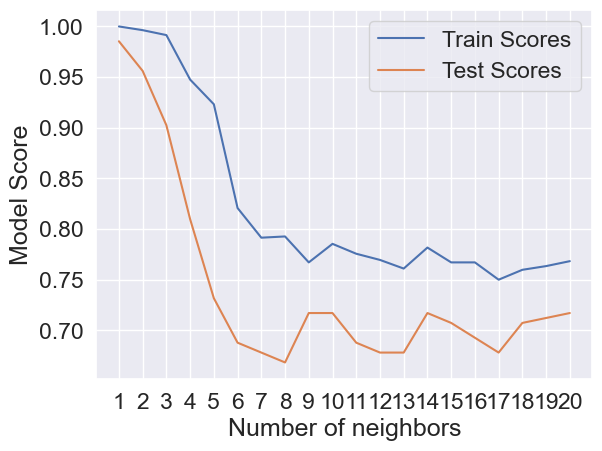

In [205]:
plt.plot(neighbors,train_scores,label="Train Scores")
plt.plot(neighbors,test_scores,label="Test Scores")
plt.xlabel("Number of neighbors")
plt.ylabel("Model Score")
plt.legend()
plt.xticks(np.arange(1,21,1))

print(f"Maximum KNN score on test data : {max(test_scores)*100:.2f}%")

* We see that the maximum accuracy we are getting is 75.41% but this is still less compared to the baseline models of Logistic Regression and Random Forest.
* So, we should completely drop KNN model for this experiment


# Hyperparameter Tuning using RandomizedSearchCV

In [206]:
# Create a hyperparameter grid for Logistic Regression
log_reg_grid = {"C":np.logspace(-4,4,20),"solver":["liblinear"]}

# Create a hyperparameter grid for Random Forest Classifier
rf_grid = {"n_estimators":np.arange(10,1000,50),"max_depth":[None,3,5,10],"min_samples_split":np.arange(2,20,2),"min_samples_leaf":np.arange(1,20,2)}

In [207]:
#Tune Logistic Regression

np.random.seed(42)

#Search random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),param_distributions=log_reg_grid,cv=5,n_iter=20,verbose=True)

#Fit this on the training data
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [208]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 1.623776739188721}

In [209]:
rs_log_reg.score(X_test,y_test)

0.7853658536585366

* Now let's tune Random Forest

In [213]:
# Set up random seed
np.random.seed(42)

#Set up random hyperparameter search for Random Forest Classifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),param_distributions=rf_grid,cv=5,n_iter=20,verbose=True)

#Fit on training data
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [214]:
rs_rf.best_params_

{'n_estimators': 510,
 'min_samples_split': 14,
 'min_samples_leaf': 1,
 'max_depth': None}

In [215]:
rs_rf.score(X_test,y_test)

0.926829268292683

# Hyperparameter Tuning using GridSearchCV

In [216]:
# Set up a hyperparameter grid for Logistic Regression
log_reg_grid = {"C":np.logspace(-4,4,30),"solver":["liblinear"]}

# Set up grid hyperparameter search for Logistic Regression
gs_log_reg = GridSearchCV(LogisticRegression(),cv=5,param_grid=log_reg_grid,verbose=True)

# Fit over the training data
gs_log_reg.fit(X_train,y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [217]:
# Finding the best hyperparameters
gs_log_reg.best_params_

{'C': 1.3738237958832638, 'solver': 'liblinear'}

In [218]:
gs_log_reg.score(X_test,y_test)

0.7853658536585366

 # Using different evaluation metrics:-
* ROC Curve and AUC score
* Confusion Matrix
* Precision
* Recall
* F1-Score
* Classification Report


In [219]:
# Make predictions
y_preds = gs_log_reg.predict(X_test)

In [220]:
y_preds

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0], dtype=int64)

In [221]:
y_test

527    1
359    1
447    0
31     1
621    0
      ..
832    1
796    1
644    1
404    0
842    0
Name: target, Length: 205, dtype: int64

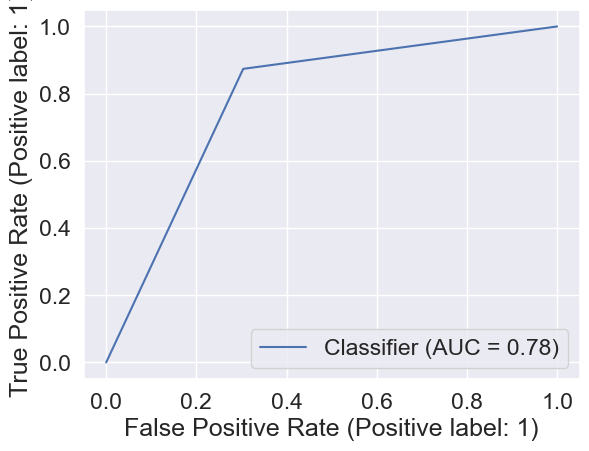

In [222]:
# ROC Curve and AUC score
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_test,y_preds);

In [223]:
# Confusion Matrix
print(confusion_matrix(y_test,y_preds))

[[71 31]
 [13 90]]


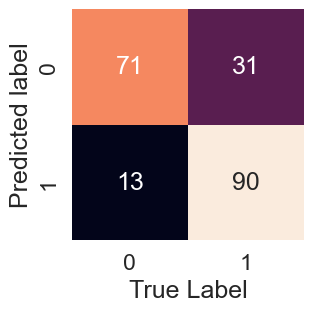

In [224]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test,y_preds):
    """
    Plots a confusion matrix using Seaborn's Heatmap
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),annot=True,cbar=False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted label")

plot_conf_mat(y_test,y_preds)

In [225]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.85      0.70      0.76       102
           1       0.74      0.87      0.80       103

    accuracy                           0.79       205
   macro avg       0.79      0.78      0.78       205
weighted avg       0.79      0.79      0.78       205



# Calculate evaluation metrics using cross-validation

We will use `cross_val_score()`

In [226]:
# Check best hyperparameters 
gs_log_reg.best_params_

{'C': 1.3738237958832638, 'solver': 'liblinear'}

In [227]:
# Create a new classifier with best parameters
clf = LogisticRegression(C=0.20433597178569418,solver="liblinear")

In [228]:
# Cross-val accuracy
cv_acc = cross_val_score(clf,X,y,cv=5,scoring="accuracy")
cv_acc.mean()

0.8458536585365855

In [229]:
# Cross-val precision
cv_prec = cross_val_score(clf,X,y,cv=5,scoring='precision')
cv_prec.mean()

0.8140908250785517

In [230]:
# Cross-val recall
cv_recall = cross_val_score(clf,X,y,cv=5,scoring='recall')
cv_recall.mean()

0.9069362084456424

In [231]:
# Cross-val f1
cv_f1 = cross_val_score(clf,X,y,cv=5,scoring='f1')
cv_f1.mean()

0.8579960964556059

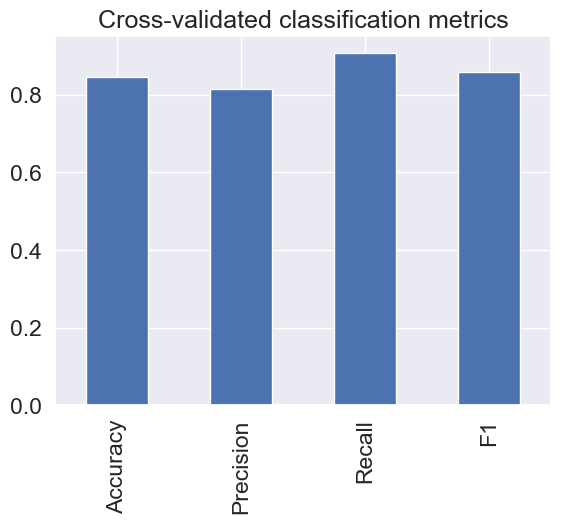

In [232]:
# Visualize our cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy":cv_acc.mean(),"Precision":cv_prec.mean(),"Recall":cv_recall.mean(),"F1":cv_f1.mean()},index=[0])

cv_metrics.T.plot.bar(title = "Cross-validated classification metrics",legend=False);

# Feature importance

* Which features contributed the most to the outcomes of the model and how?

In [233]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [234]:
# Fit an instance of Logistic Regression

clf = LogisticRegression(C=0.20433597178569418,solver="liblinear")

clf.fit(X_train,y_train);

In [235]:
# Check coef_
clf.coef_

array([[ 0.01575041, -1.26513804,  0.77534749, -0.01372247, -0.00699635,
        -0.14437762,  0.28403547,  0.03492794, -0.64220262, -0.62256939,
         0.46428643, -0.7532662 , -0.91923673]])

In [236]:
feature_dict = dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.01575041287171817,
 'sex': -1.265138039052774,
 'cp': 0.7753474858662072,
 'trestbps': -0.013722473580064551,
 'chol': -0.006996352428353612,
 'fbs': -0.14437761582262348,
 'restecg': 0.2840354705668007,
 'thalach': 0.03492793717786608,
 'exang': -0.6422026156704673,
 'oldpeak': -0.6225693931528992,
 'slope': 0.46428642841140705,
 'ca': -0.7532662042369833,
 'thal': -0.9192367340438634}

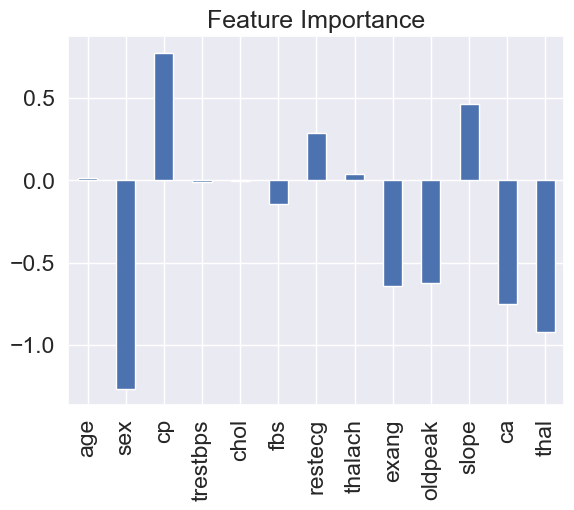

In [237]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="Feature Importance",legend=False);

We can infer that sex and target are strongly negatively correlated 
* Let's try to look into this more

In [238]:
pd.crosstab(df["sex"],df["target"])

target,0,1
sex,,
0,86,226
1,413,300


In [239]:
pd.crosstab(df["slope"],df["target"])

target,0,1
slope,,
0,46,28
1,324,158
2,129,340


In [240]:
pd.crosstab(df["exang"],df["target"])

target,0,1
exang,,
0,225,455
1,274,71


# What do we learn from this?
* Firstly, we can scrap the features which provide little to no meaning to target.
* Secondly, we can give more importance to the features having a greater importance